# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project | Digital Marketing Campaign Conversion Prediction</p>

<img src="https://github.com/am-eric/DigitalMarketing-Analytics/blob/main/images/intro.jpg?raw=true" width="1800">

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:120%; text-align:left">

<h3 align="left"><font color=blue>Problem:</font></h3>

In this project, we analyze a dataset containing various factors influencing digital marketing campaign conversions, including age, gender, campaign type, campaign channel, ad spend, previous purchases, and loyalty points. Our goal is to develop a predictive model capable of accurately identifying potential customers who are likely to convert after interacting with a marketing campaign. Since maximizing conversion rates is essential for optimizing marketing budgets, our primary emphasis is on ensuring that the model effectively differentiates between converting and non-converting customers, making precision and recall key evaluation metrics.

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Objectives:</font></h3>

* Explore the Dataset: Identify key trends, distributions, and relationships that impact marketing conversions.

* Conduct Extensive Exploratory Data Analysis (EDA): Analyze bivariate relationships with conversion rates to uncover influential factors.

* Preprocessing Steps:
    - Remove irrelevant or redundant features
    - Handle missing values effectively
    - Detect and treat outliers
    - Encode categorical variables for model compatibility
    - Normalize or scale features where necessary to enhance model performance

* Model Building:

    - Implement and optimize classification models such as Logistic Regression, Decision Trees, Random Forest, XGBoost
    
    - Prioritize maximizing recall for the positive class to ensure effective identification of potential customers

* Evaluate and Compare Model Performance: Assess models using accuracy, precision, recall, and F1-score to determine the best approach for predicting digital marketing conversions.

<a id="contents_table"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Table of Contents:</font></h3>
    
* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Dataset Overview](#overview)
    - [Step 3.1 | Dataset Basic Information](#basic)
    - [Step 3.2 | Summary Statistics for Numerical Variables](#num_statistics)
    - [Step 3.3 | Summary Statistics for Categorical Variables](#cat_statistics)
* [Step 4 | EDA](#eda)
    - [Step 4.1 | Univariate Analysis](#univariate)
        - [Step 4.1.1 | Univariate Analysis for Numerical features](#num_uni)
        - [Step 4.1.2 | Univariate Analysis for categorical features](#cat_uni)
    - [Step 4.2 | Bivariate Analysis](#bivariate)
        - [Step 4.2.1 | Numerical Features vs Target](#num_target)
        - [Step 4.2.2 | Categorical Features vs Target](#cat_target)
    - [Step 4.3 | Multivariate Analysis](#multivariate)
         - [Step 4.3.1 | Heatmap](#heatmap)
* [Step 5 | Data Preprocessing](#preprocessing)
    - [Step 5.1 | Removal of Irrelevant features](#feature_removal)
    - [Step 5.2 | Check Missing Values](#missing)
    - [Step 5.3 | Outlier Treatment](#outlier)
    - [Step 5.4 | Categorical Features Encoding](#encoding)
    - [Step 5.5 | Feature Scaling](#scaling)
    - [Step 5.6 | Using SMOTE for handling Imbalance Data](#smote)
    - [Step 5.7 | Splitting the Data](#split)
* [Step 6 | Logistic Regression Model Building](#logistic)
    - [Step 6.1 | Define the base Logistic Regression Model](#logistic_base)
    - [Step 6.2 | Logistic Regression Model Evaluation](#logistic_eval)
* [Step 7 | Decision Tree Model Building](#dt)
    - [Step 7.1 | Define the base Decision Tree Model](#dt_base)
    - [Step 7.2 | Decision Tree Model Evaluation](#dt_eval)
* [Step 8 | Random Forest Model Building](#rf)
    - [Step 8.1 | Define the base Random Forest Model](#rf_base)
    - [Step 8.2 | Random Forest Model Evaluation](#rf_eval)
* [Step 9 | XG-Boost Model Building](#xgb)
    - [Step 9.1 | Define the base XGBoost Model](#xgb_base)
    - [Step 9.2 | XGBoost Model Evaluation](#xgb_eval)
* [Step 10 | Model Comparison](#comparison)
* [Step 11 | Conclusion](#conclusion)

<h2 align="left"><font color=blue>Let's get started:</font></h2>

<a id="import"></a>
# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

⬆️ [Table of Contents](#contents_table)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score,precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_auc_score,roc_curve

import warnings
warnings.filterwarnings('ignore')

<a id="read"></a>
# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Load the dataset</p>

⬆️ [Table of Contents](#contents_tabel)

In [2]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\digital_marketing_campaign_dataset real.csv")
data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:120%; text-align:left">

<h2 align="left"><font color=blue>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __CustomerID__ | Unique identifier for each customer |
| __Age__ | Age of the customer |
| __Gender__ | Gender of the customer (Male/Female) |
| __Income__ | Annual income of the customer in USD |
| __CampaignChannel__ | The channel through which the marketing campaign is delivered (Email, Social Media, SEO, PPC, Referral) |                     
| __CampaignType__ | Type of the marketing campaign (Awareness, Consideration, Conversion, Retention) |
| __AdSpend__ | Amount spent on the marketing campaign in USD |  
| __ClickThroughRate__ | Rate at which customers click on the marketing content |                      
| __ConversionRate__ | Rate at which clicks convert to desired actions (e.g., purchases) |
| __AdvertisingPlatform__ | Confidential |
| __AdvertisingTool__ | Confidential |                      
| __WebsiteVisits__ | Number of visits to the website |              
| __PagesPerVisit__ | Average number of pages visited per session  |
| __TimeOnSite__ | Average time spent on the website per visit (in minutes)  |
| __SocialShares__ | Number of times the marketing content was shared on social media  |
| __EmailOpens__ | Number of times marketing emails were opened  |
| __EmailClicks__ | Number of times links in marketing emails were clicked  |
| __PreviousPurchases__ | Number of previous purchases made by the customer  |
| __LoyaltyPoints__ | Number of loyalty points accumulated by the customer  |
| __Conversion__ | Binary variable indicating whether the customer converted (1) or not (0) |





<a id="overview"></a>
# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    
Dataset Exploration:

<a id="basic"></a>
# <b><span style='color:#4B0082'>Step 3.1 |</span><span style='color:blue'> Dataset Basic Information</span></b>

In [3]:
# Summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

* __Number of Entries__: The dataset consists of __8000 entries__, ranging from index 0 to 8000.
    
    
* __Columns__: There are __20 columns__ in the dataset corresponding to various attributes of the digital marketing campaign.
    
    
* __Data Types__:
    - Half of the columns (10 out of 20) are of the __int64__ data type.
    - 5 columns are of the float64 data type.
    - 5 columns are object
    
    
* __Missing Values__: There don't appear to be any missing values in the dataset as each column has 8000 non-null entries.

<a id="num_statistics"></a>
# <b><span style='color:#4B0082'>Step 3.2 |</span><span style='color:blue'> Summary Statistics for Numerical Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Summary statistics for __numerical__ attributes:

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,8000.0,11999.500000,2309.545410,8000.000000,9999.750000,11999.500000,13999.250000,15999.000000
Age,8000.0,43.625500,14.902785,18.000000,31.000000,43.000000,56.000000,69.000000
Income,8000.0,84664.196750,37580.387945,20014.000000,51744.500000,84926.500000,116815.750000,149986.000000
AdSpend,8000.0,5000.944830,2838.038153,100.054813,2523.221165,5013.440044,7407.989369,9997.914781
ClickThroughRate,8000.0,0.154829,0.084007,0.010005,0.082635,0.154505,0.228207,0.299968
ConversionRate,8000.0,0.104389,0.054878,0.010018,0.056410,0.104046,0.152077,0.199995
WebsiteVisits,8000.0,24.751625,14.312269,0.000000,13.000000,25.000000,37.000000,49.000000
PagesPerVisit,8000.0,5.549299,2.607358,1.000428,3.302479,5.534257,7.835756,9.999055
TimeOnSite,8000.0,7.727718,4.228218,0.501669,4.068340,7.682956,11.481468,14.995311
SocialShares,8000.0,49.799750,28.901165,0.000000,25.000000,50.000000,75.000000,99.000000


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Numerical Features:</font></h3>

* __`Age`__: The average age of the customers is approximately 43.63 years, with the youngest being 18 and the oldest 69 years old.
* __`Income`__: The average income of the customers is around $84,664, with values ranging from $20,014 to $149,986.
  
* __`AdSpend`__: The average advertising spend per customer is about $5,000, with a minimum of $100 and a maximum of $9,997.
* __`ClickThroughRate`__: The average click-through rate (CTR) is 0.154, with values ranging from 0.01 to 0.299.
* __`ConversionRate`__: On average, the conversion rate is 0.104, with a minimum of 0.01 and a maximum of 0.199.
* __`WebsiteVisits`__: Customers visit the website approximately 24.75 times on average, with values ranging from 0 to 49 visits.
* __`PagesPerVisit`__: The average number of pages viewed per visit is about 5.55, with a range from 1.00 to 9.99.
* __`TimeOnSite`__: Customers spend an average of 7.73 minutes on the site, with values ranging from 0.5 to 14.99 minutes.
* __`SocialShares`__: The average number of social media shares per customer is about 49.8, with a minimum of 0 and a maximum of 99.
* __`EmailOpens`__: Customers open marketing emails approximately 9.48 times on average, with values ranging from 0 to 19.
* __`EmailClicks`__: The average number of times customers click on emails is 4.47, with values ranging from 0 to 9.
* __`PreviousPurchases`__: On average, customers have made 4.49 previous purchases, with values ranging from 0 to 9.
* __`LoyaltyPoints`__: Customers have an average of 2,490 loyalty points, with a minimum of 0 and a maximum of 4,999.
* __`Conversion`__: The overall conversion rate across all customers is 87.65%, indicating a high likelihood of customers making a purchase.

<a id="cat_statistics"></a>
# <b><span style='color:#4B0082'>Step 3.3 |</span><span style='color:blue'> Summary Statistics for Categorical Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Summary statistics of the categorical features:

In [5]:
data.describe(include='object')

,Gender,CampaignChannel,CampaignType,AdvertisingPlatform,AdvertisingTool
count,8000,8000,8000,8000,8000
unique,2,5,4,1,1
top,Female,Referral,Conversion,IsConfid,ToolConfid
freq,4839,1719,2077,8000,8000


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=blue>Categorical Features (object data type):</font></h3>

* __`Gender`__: There are two unique values, with Female being the most frequent category, occurring 4,839 times out of 8,000 entries.
* __`CampaignChannel`__: Five unique campaign channels are present. The most common channel is Referral, appearing 1,719 times.
* __`CampaignType`__: Four campaign types exist, with Conversion being the most frequent, occurring 2,077 times.
* __`AdvertisingPlatform`__: Only one unique platform (IsConfid) is present, appearing in all 8,000 entries.
* __`AdvertisingTool`__: A single unique tool (ToolConfid) is recorded in all 8,000 entries.

<a id="eda"></a>
# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

For our __Exploratory Data Analysis (EDA)__, we will follow three key steps:

>__1. Univariate Analysis__: We examine each feature individually to understand its distribution, central tendency, and range. This step helps identify  overall data trends.
>
>__2. Bivariate Analysis__: We explore the relationship between each independent feature and the target variable. This step helps us understand how different features impact the outcome and can reveal potential correlations or patterns.
>
>__3. Multivariate Analysis__: We analyze the interactions between multiple features simultaneously. This step helps in uncovering complex dependencies, interactions, and combined effects of variables on the target outcome. It aids in feature selection and improving model performance.

By following these steps, we aim to gain deep insights into the data, ensuring a strong foundation for predictive modeling.

<a id="univariate"></a>
# <b><span style='color:#4B0082'>Step 4.1 |</span><span style='color:blue'> Univariate Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

We undertake univariate analysis on the dataset's features, based on their datatype:

* For __continuous data__: We employ histograms to gain insight into the distribution of each feature. This allows us to understand the central tendency, spread, and shape of the dataset's distribution.

    
* For __categorical data__: Bar plots are utilized to visualize the frequency of each category. This provides a clear representation of the prominence of each category within the respective feature.

By employing these visualization techniques, we're better positioned to understand the individual characteristics of each feature in the dataset.

<a id="num_uni"></a>
### <b><span style='color:#4B0082'>Step 4.1.1 |</span><span style='color:blue'> Univariate Analysis for Numerical features</span></b>  

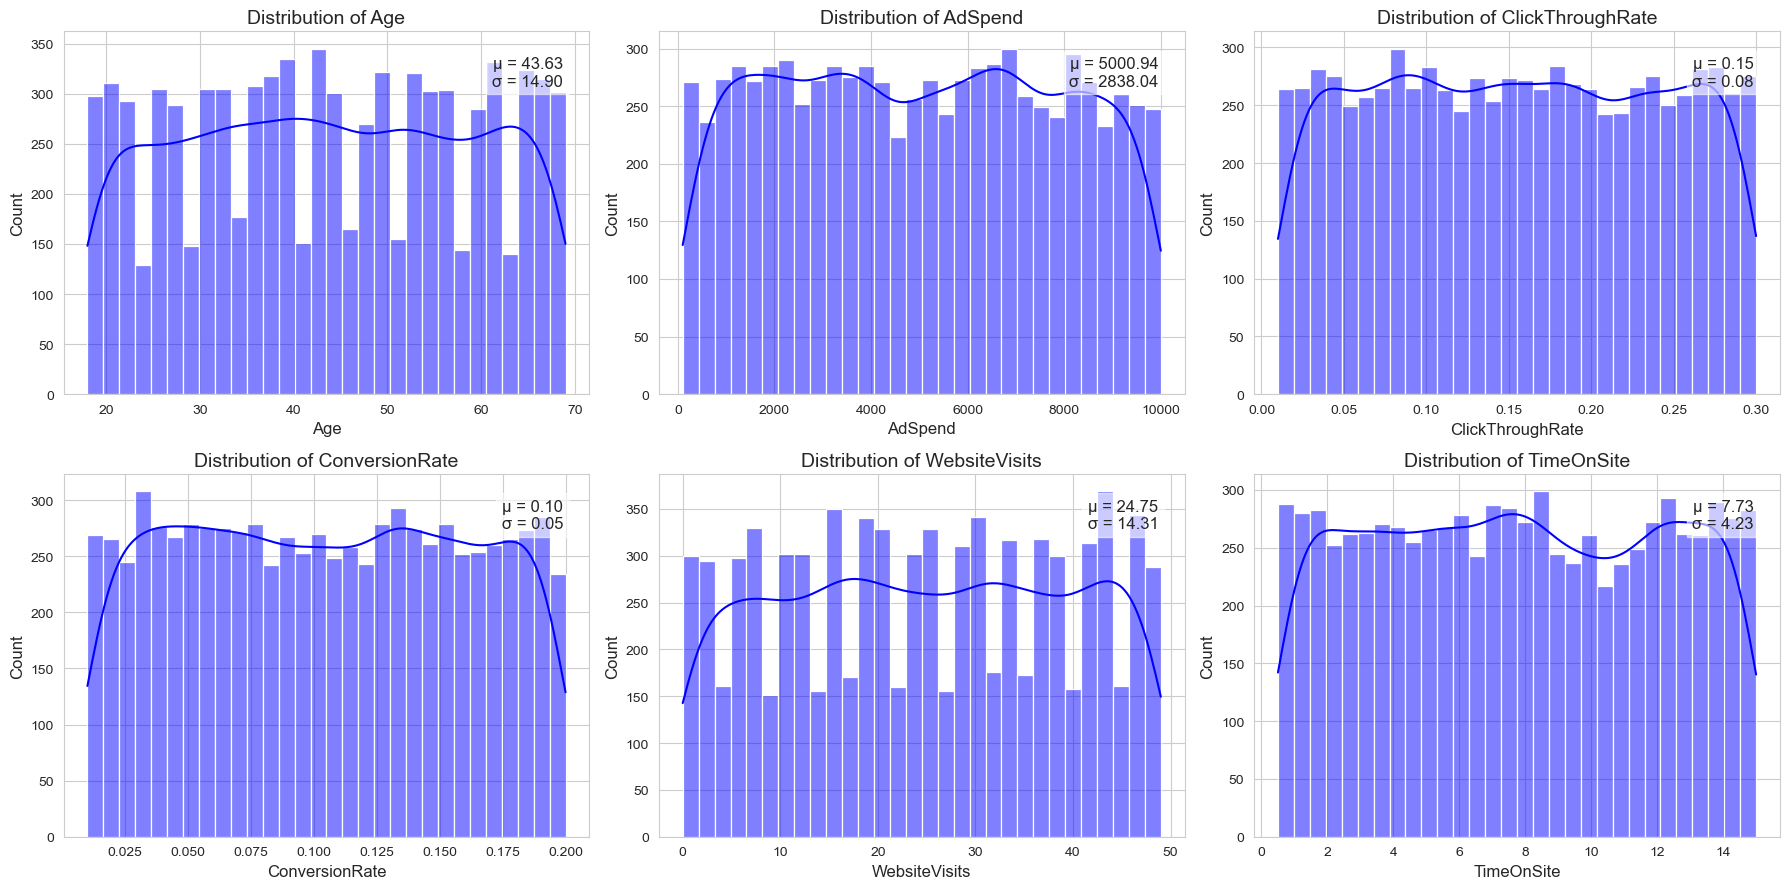

In [6]:
# List of continuous variables to plot
continuous_vars = ["Age", "AdSpend", "ClickThroughRate", "ConversionRate", "WebsiteVisits", "TimeOnSite"]

# Set the style for the plots
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 9))
axes = axes.flatten()

# Generate distribution plots for each continuous variable
for i, var in enumerate(continuous_vars):
    sns.histplot(data[var], kde=True, color="blue", bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {var}", fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    
    # Annotate mean and std
    mean_val = data[var].mean()
    std_val = data[var].std()
    axes[i].annotate(f"\u03BC = {mean_val:.2f}\n\u03C3 = {std_val:.2f}", xy=(0.95, 0.85), xycoords='axes fraction',
                     fontsize=12, bbox=dict(facecolor='white', alpha=0.6), ha='right')

plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

* __Age__: The age distribution is relatively uniform, with a peak around the mid-40s. The mean age is approximately 43.63 years, with a standard deviation of 14.90 years.
    
    
* __Ad Spend__: The ad spend is widely distributed, with values concentrated between 2000 and 8000. The mean ad spend is 5000.94, with a standard deviation of 2838.04.
    
    
* __Click-Through Rate (CTR)__: CTR is distributed between 0.00 and 0.30, with most values centered around 0.15. The standard deviation is 0.08, indicating moderate variability.
    
    
* __Conversion Rate__: The conversion rate is primarily spread between 0.025 and 0.175, with a mean value of 0.10 and a standard deviation of 0.05, showing a relatively balanced conversion performance.
    
    
* __Website Visits__: Most users have between 10 and 40 website visits, with a mean of 24.75 visits and a standard deviation of 14.31. This indicates a wide spread in engagement levels.

* __Time on Site__: Time spent on the site varies between 0 and 14 minutes, with peaks around 7–8 minutes. The mean time is 7.73 minutes, and the standard deviation is 4.23 minutes, indicating different user behavior patterns.
    
____

Upon reviewing the histograms of the continuous features and cross-referencing them with the provided feature descriptions, everything appears consistent and within expected ranges. __There doesn't seem to be any noticeable noise or implausible values among the continuous variables.__

<a id="cat_uni"></a>
### <b><span style='color:#4B0082'>Step 4.1.2 |</span><span style='color:blue'> Univariate Analysis for categorical features</span></b>  

# 1. Gender

In [7]:
data['Gender'].value_counts()


Gender
Female    4839
Male      3161
Name: count, dtype: int64

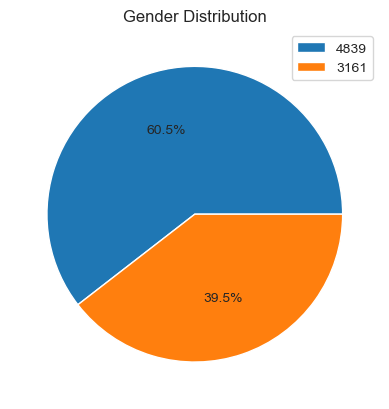

In [8]:
plt.pie(data['Gender'].value_counts(), autopct='%1.1f%%')
plt.title('Gender Distribution');
plt.legend(labels=data['Gender'].value_counts())

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:120%; text-align:left">

<h3 align="left"><font color=blue>Conclusion:</font></h3>

The dataset shows that 60.5% of the members are female, indicating a higher proportion of female participants in the digital marketing campaign. This suggests that the campaign may be targeting or attracting more female users. Depending on the business objective, this insight can help refine marketing strategies, such as tailoring ad content, adjusting campaign channels, or exploring ways to engage more male customers if needed.


# 2. Campaign Channel

In [9]:
data['CampaignChannel'].value_counts()

CampaignChannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64

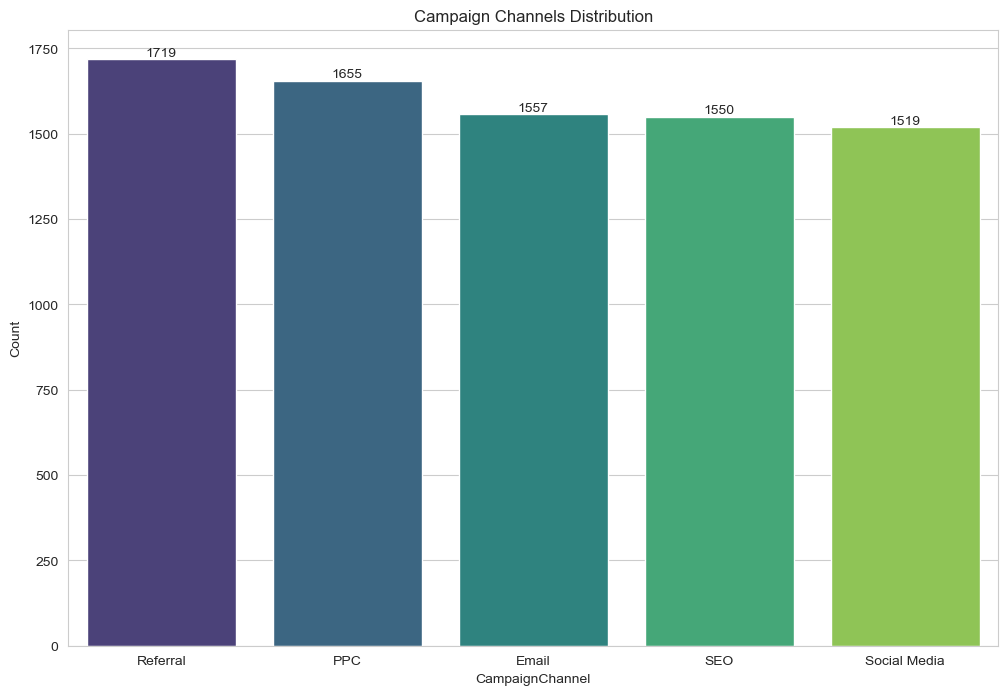

In [100]:
#plot bar plot for campaign channels
plt.figure(figsize=(12,8))

x = data['CampaignChannel'].value_counts().index
y = data['CampaignChannel'].value_counts().values

sns.barplot(x=x, y=y, palette='viridis')
plt.title('Campaign Channels Distribution')
plt.ylabel('Count')

# Adding values on top of the bars
for i, value in enumerate(y):
    plt.text(i, value + 0.5, f'{value}', ha='center', va='bottom')

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:120%; text-align:left">

<h3 align="left"><font color=blue>Conclusion:</font></h3>

The most used campaign channel is Referral (1719 campaigns), followed by PPC (1655), Email (1557), SEO (1550), and Social Media (1519). This suggests that Referral marketing is the most utilized strategy in this dataset, potentially indicating strong word-of-mouth marketing. PPC and Email are also widely used, showing a focus on paid advertisements and direct customer engagement. Social Media, while commonly seen as an effective platform, has the lowest count, suggesting that it may be underutilized in this campaign. Further analysis can explore which channels have the highest conversion rates to optimize marketing efforts.

# 3. Campaign Type

In [11]:
data['CampaignType'].value_counts()

CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64

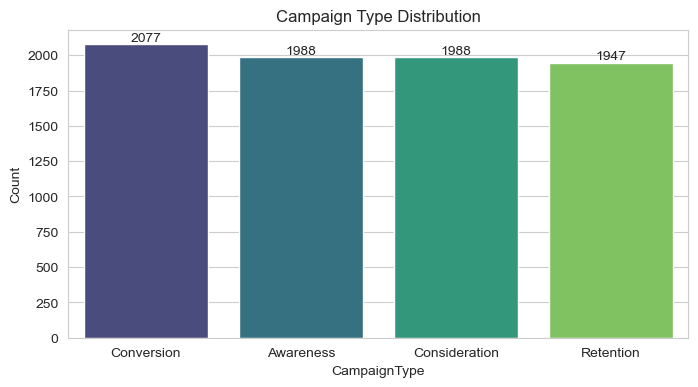

In [101]:
#plot bar plot for campaign type
plt.figure(figsize=(8,4))

x = data['CampaignType'].value_counts().index
y = data['CampaignType'].value_counts().values

sns.barplot(x=x, y=y, palette='viridis')
plt.title('Campaign Type Distribution')
plt.ylabel('Count')

# Adding values on top of the bars
for i, value in enumerate(y):
    plt.text(i, value + 0.5, f'{value}', ha='center', va='bottom')

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:120%; text-align:left">

<h3 align="left"><font color=blue>Conclusion:</font></h3>

The most frequent campaign type is Conversion (2077 campaigns), followed by Awareness (1988), Consideration (1988), and Retention (1947). This suggests that the primary focus of the marketing efforts is driving conversions, which aligns with business goals aimed at increasing sales or sign-ups. Awareness and Consideration campaigns are equally prioritized, indicating a balanced effort in attracting potential customers. Retention campaigns, though slightly lower in count, are still significant, reflecting efforts to engage existing customers. Further analysis can explore which campaign type is most effective in driving actual conversions.

____
<a id="bivariate"></a>
# <b><span style='color:#4B0082'>Step 4.2 |</span><span style='color:blue'> Bivariate Analysis</span></b>

<a id="num_target"></a>
### <b><span style='color:#4B0082'>Step 4.2.1 |</span><span style='color:blue'> Numerical Features vs Target</span></b>  

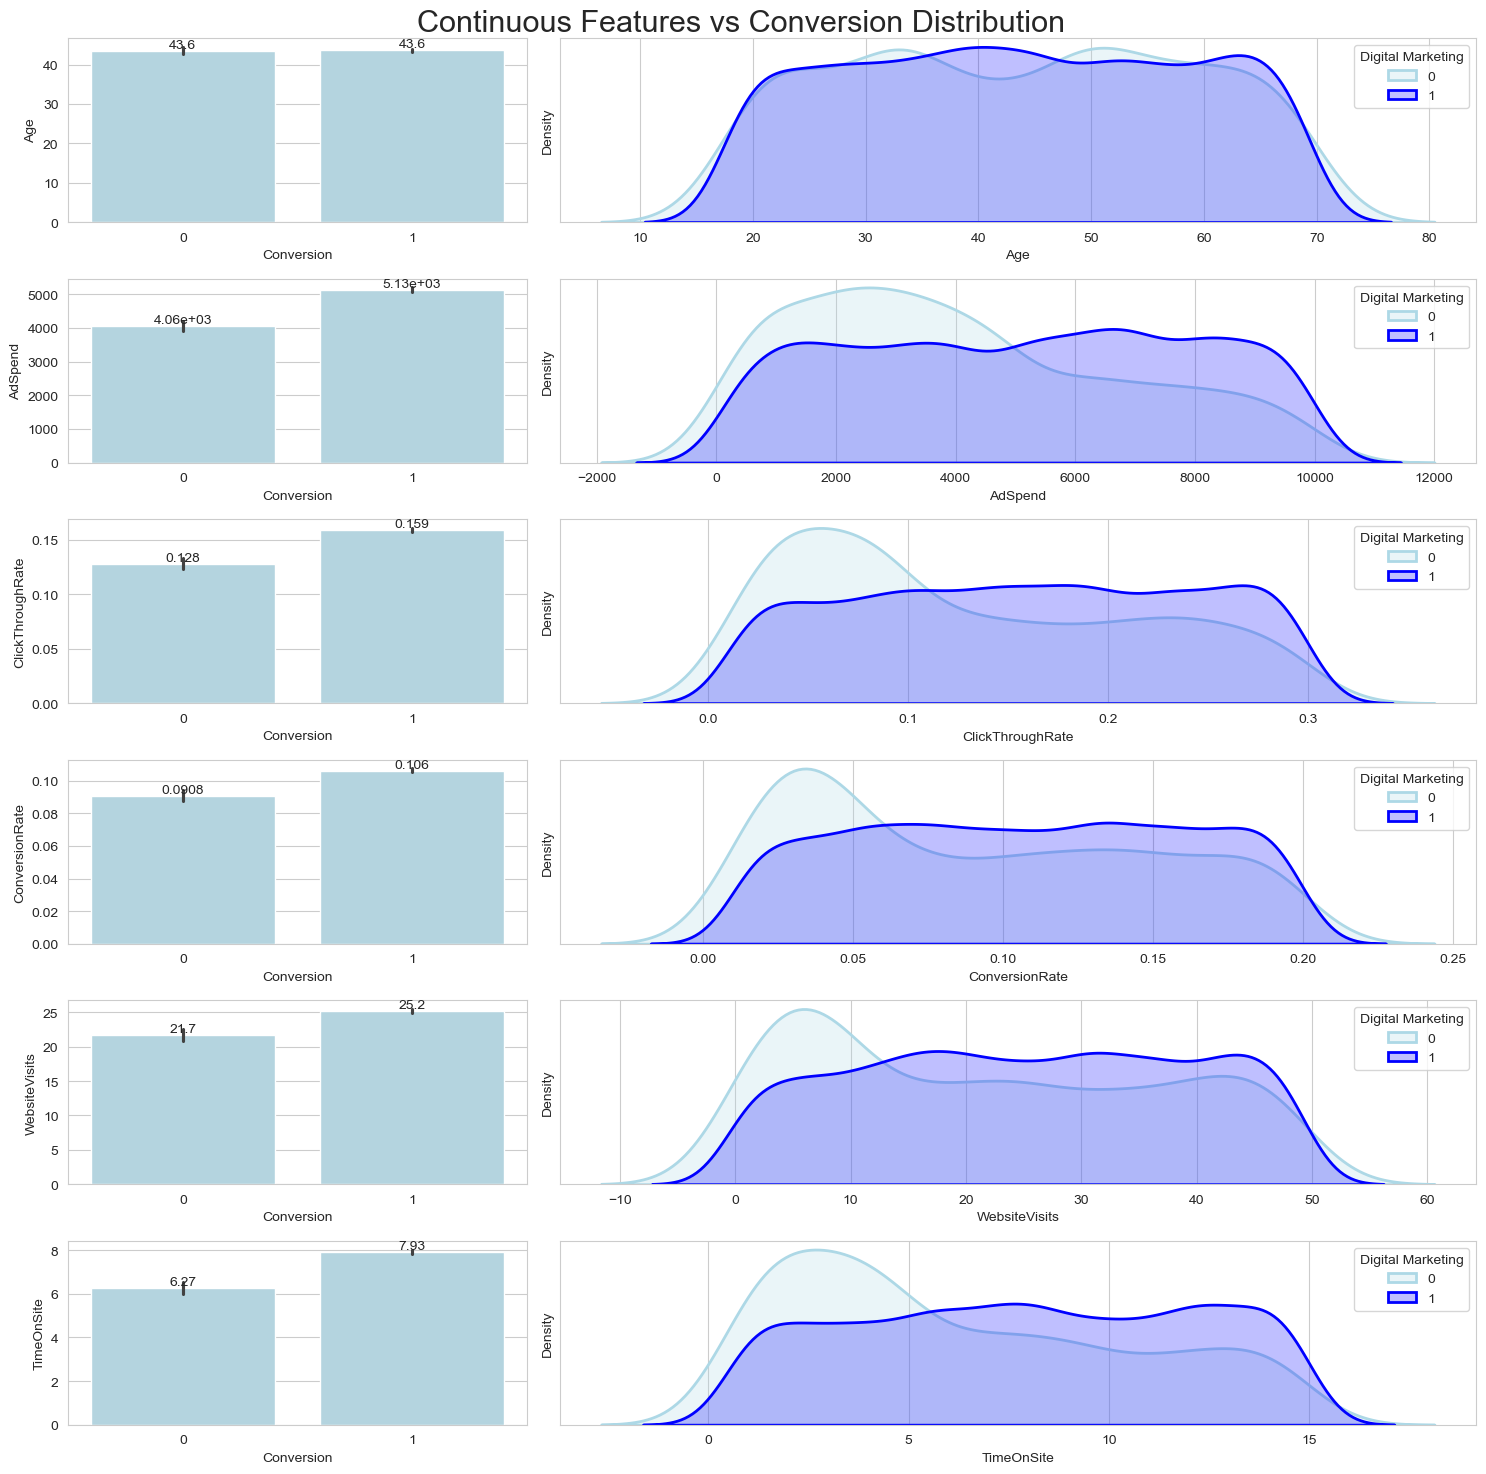

In [13]:
# Set color palette
sns.set_palette(['#ADD8E6', 'blue'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_vars), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_vars):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=data, x="Conversion", y=col, ax=ax[i,0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=data[data["Conversion"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=data[data["Conversion"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Digital Marketing', loc='upper right')
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='%.3g')
        
# Set the title for the entire figure
plt.suptitle('Continuous Features vs Conversion Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>
    
* __Age__: The average age for both converted (1) and non-converted (0) users is around 43.6 years, indicating that age alone may not be a strong differentiator for conversion.

    
* __Ad Spend__: Converted users tend to have higher ad spend (5.13k) than non-converted users (4.06k). This suggests that higher ad investments could lead to better conversions.

    
* __Click-Through Rate (CTR)__: Users who converted have a higher mean CTR (0.159) than those who didn’t (0.128), showing that a better engagement rate might contribute to conversions.
 
    
* __Conversion Rate__: Converted users have a higher mean conversion rate (0.106) compared to non-converted ones (0.0908), indicating that past conversion trends influence new conversions.

    
* __Website Visits__: On average, users who converted visited the website more frequently (25.2 visits) compared to non-converted users (21.7 visits), implying that repeated engagement may drive conversions.


* __Time on Site__: Converted users spent more time (7.93 mins) on the site compared to non-converted users (6.27 mins), suggesting that longer interaction increases the likelihood of conversion.
    
____
    
Maximum impact: Ad Spend and Click-Through Rate seem to have the most influence on conversions.

Moderate impact: Website Visits and Time on Site play a supporting role in conversions.

Lower impact: Age does not show a significant difference in conversion trends.

____
<a id="cat_target"></a>
### <b><span style='color:#4B0082'>Step 4.2.2 |</span><span style='color:blue'> Categorical Features vs Target</span></b>  

# 1. Campaign Type vs Conversion

In [14]:
# group the columns
campaigntype_target = data[['CampaignType', 'Conversion']]
campaigntype_target

,CampaignType,Conversion
0,Awareness,1
1,Retention,1
2,Awareness,1
3,Conversion,1
4,Conversion,1
...,...,...
7995,Awareness,0
7996,Retention,0
7997,Consideration,1
7998,Consideration,1


In [15]:
avg_campaigntype = campaigntype_target.groupby('CampaignType').agg({
    'Conversion': 'mean'
})
avg_campaigntype

,Conversion
CampaignType,
Awareness,0.855634
Consideration,0.855634
Conversion,0.933558
Retention,0.858243


<Figure size 1200x1000 with 0 Axes>

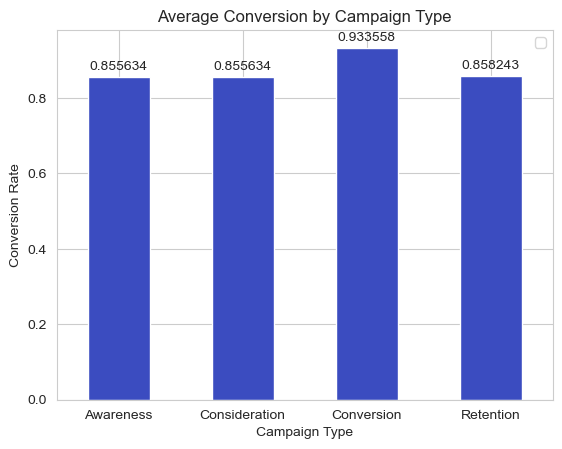

In [16]:
#plot visualization 
plt.figure(figsize=(12,10))

ax = avg_campaigntype.plot(kind='bar', colormap='coolwarm')

# Add data labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

plt.xlabel('Campaign Type')
plt.ylabel('Conversion Rate')
plt.title('Average Conversion by Campaign Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)
plt.legend([],[])

plt.show();


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

The bar plot illustrates the average conversion rate for different campaign types:

* Conversion Campaigns (0.93) show the highest conversion rate, indicating that campaigns directly focused on conversion are the most effective at driving customer actions.
  
* Awareness (0.86), Consideration (0.86), and Retention (0.86) campaigns have slightly lower but still strong conversion rates.

* The similarity in conversion rates across Awareness, Consideration, and Retention suggests that these campaigns are performing well but may not be optimized specifically for driving immediate conversions.

# 2. Campaign Channel vs Conversion

In [17]:
# group the columns
campaignchannel_target = data[['CampaignChannel', 'Conversion']]
campaignchannel_target

,CampaignChannel,Conversion
0,Social Media,1
1,Email,1
2,PPC,1
3,PPC,1
4,PPC,1
...,...,...
7995,Email,0
7996,SEO,0
7997,Referral,1
7998,PPC,1


In [18]:
avg_campaignchannel = campaignchannel_target.groupby('CampaignChannel').agg({
    'Conversion': 'mean'
})
avg_campaignchannel

,Conversion
CampaignChannel,
Email,0.870263
PPC,0.882779
Referral,0.883072
SEO,0.876774
Social Media,0.868334


<Figure size 1200x1000 with 0 Axes>

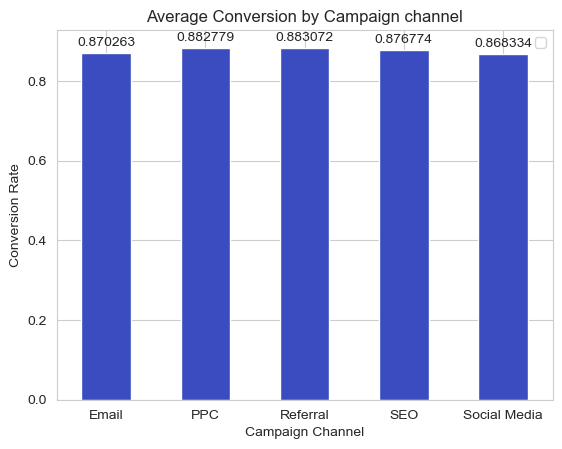

In [19]:
#plot visualization 
plt.figure(figsize=(12,10))

ax = avg_campaignchannel.plot(kind='bar', colormap='coolwarm')

# Add data labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

plt.xlabel('Campaign Channel')
plt.ylabel('Conversion Rate')
plt.title('Average Conversion by Campaign channel')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)
plt.legend([],[])

plt.show();

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

* The bar plot shows the average conversion rate across different marketing channels:

    - Referral (0.88) and PPC (0.88) have the highest conversion rates, indicating that these channels are the most effective at driving conversions.

    - SEO (0.88) and Email (0.87) perform slightly lower but still maintain strong conversion rates.

    - Social Media (0.87) has the lowest conversion rate among the channels but is still highly competitive.

# 3. Gender vs Conversion

In [20]:
# group the columns
gender_target = data[['Gender', 'Conversion']]
gender_target

,Gender,Conversion
0,Female,1
1,Male,1
2,Female,1
3,Female,1
4,Female,1
...,...,...
7995,Male,0
7996,Female,0
7997,Female,1
7998,Female,1


In [21]:
avg_gender = gender_target.groupby('Gender').agg({
    'Conversion': 'mean'
})
avg_gender

,Conversion
Gender,
Female,0.876214
Male,0.876938


<Figure size 1200x1000 with 0 Axes>

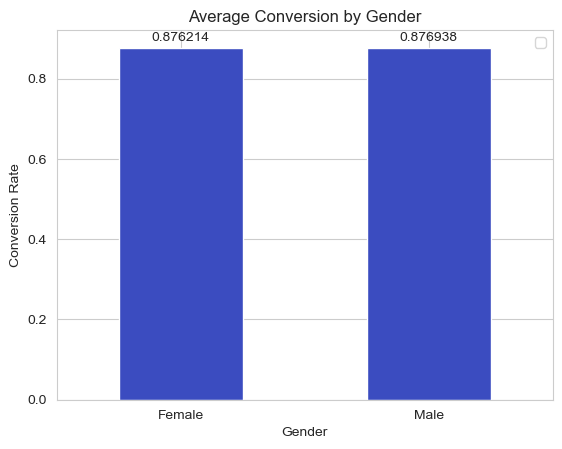

In [22]:
#plot visualization 
plt.figure(figsize=(12,10))

ax = avg_gender.plot(kind='bar', colormap='coolwarm')

# Add data labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

plt.xlabel('Gender')
plt.ylabel('Conversion Rate')
plt.title('Average Conversion by Gender')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)
plt.legend([],[])

plt.show();

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

The bar plot shows the average conversion rates for male and female customers:

Males (0.8769) and Females (0.8762) have nearly identical conversion rates.

The difference is negligible, suggesting that gender does not play a significant role in conversion rates for this campaign.

# 4. Conversion Funnel Analysis

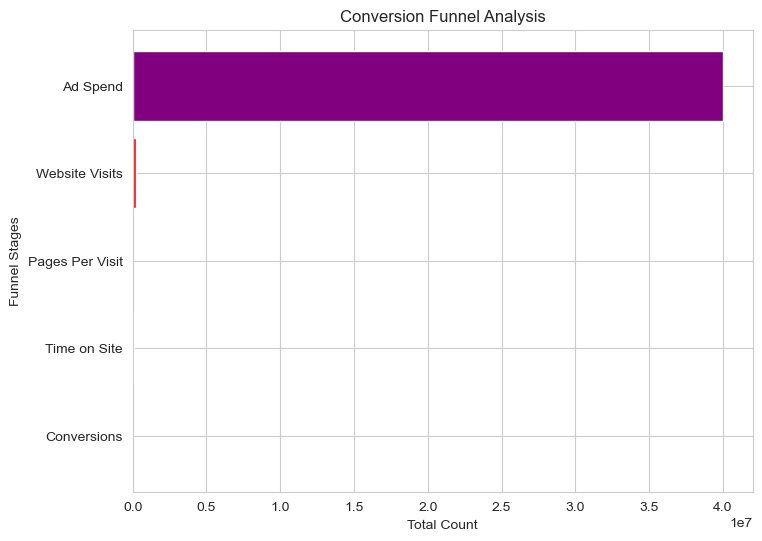

In [23]:
# Define funnel stages
funnel_stages = ["Ad Spend", "Website Visits", "Pages Per Visit", "Time on Site", "Conversions"]
values = [
    data["AdSpend"].sum(),
    data["WebsiteVisits"].sum(),
    data["PagesPerVisit"].sum(),
    data["TimeOnSite"].sum(),
    data["Conversion"].sum()
]

# Create a funnel chart
plt.figure(figsize=(8, 6))
plt.barh(funnel_stages[::-1], values[::-1], color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel("Total Count")
plt.ylabel("Funnel Stages")
plt.title("Conversion Funnel Analysis")
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

* Significant Drop-off:

    - A huge difference exists between Ad Spend and the following stages (Website Visits, Pages Per Visit, Time on Site, and Conversions).

    - This indicates that many users do not engage with the ads or visit the website after exposure.

* Low Website Visits:

    - The red bar for Website Visits is extremely small compared to Ad Spend.

    - This suggests poor ad targeting, low engagement, or unappealing ad creatives.

* High Bounce Rate:

    - The subsequent stages (Pages Per Visit, Time on Site) are almost negligible.

    - Users who do visit the site may not find it engaging or relevant, leading to quick exits.

* Conversion Rate is Very Low:

    - The final Conversion bar is the smallest, indicating a high drop-off rate in the funnel.

* Possible reasons:

    - Unoptimized landing page

    - Poor call-to-action (CTA)

    - High pricing or weak offers

* Actionable Insights

    - Improve Ad Targeting: Refine audience segmentation for better engagement.

    - Optimize Website Experience: Improve UI/UX, loading speed, and mobile-friendliness.

    - A/B Testing for Ads & Landing Pages: Test different creatives, CTAs, and messaging.

    - Retargeting Strategy: Implement retargeting campaigns to re-engage lost visitors.

# 5. Marketing Spend ROI

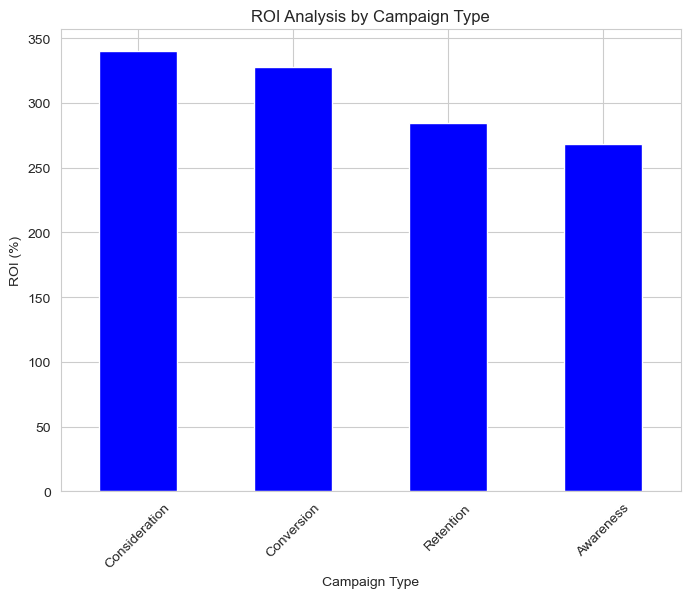

In [24]:
# Calculate Estimated Revenue (assuming revenue = ConversionRate * Income)
data["EstimatedRevenue"] = data["ConversionRate"] * data["Income"]

# Calculate ROI
data["ROI"] = ((data["EstimatedRevenue"] - data["AdSpend"]) / data["AdSpend"]) * 100

# Group by Campaign Type
roi_by_campaign = data.groupby("CampaignType")["ROI"].mean().sort_values(ascending=False)

# Plot ROI by Campaign Type
plt.figure(figsize=(8, 6))
roi_by_campaign.plot(kind='bar', color='blue')
plt.xlabel("Campaign Type")
plt.ylabel("ROI (%)")
plt.title("ROI Analysis by Campaign Type")
plt.xticks(rotation=45)
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

* Consideration and Conversion Campaigns Perform Best

    - The Consideration and Conversion campaigns have the highest ROI (~340% and ~320%), indicating these campaigns are driving the most return on investment.

    - These campaigns effectively convert engaged users into customers.

* Retention Campaigns Have Moderate ROI

    - Retention campaigns have a lower ROI than Conversion and Consideration but still generate substantial returns (~270%).

    - This suggests that keeping existing customers engaged is profitable but could be optimized further.

* Awareness Campaigns Have the Lowest ROI (~250%)

    - Awareness campaigns, designed to introduce users to the brand, have the lowest return on investment.
    
    - This is expected since these campaigns focus on visibility rather than direct conversions.

* Actionable Insights

    - Invest more in Consideration & Conversion Campaigns for maximum returns.

    - Optimize Retention Strategies by offering loyalty programs, personalized recommendations, and engagement incentives.

    - Re-evaluate Awareness Campaigns:

  * Improve targeting and messaging to ensure they lead to higher engagement.

  * Consider combining Awareness efforts with retargeting strategies for better ROI.

____
<a id="multivariate"></a>
# <b><span style='color:#4B0082'>Step 4.3 |</span><span style='color:blue'> Multivariate Analysis</span></b>

<a id="heatmap"></a>
### <b><span style='color:#4B0082'>Step 4.3.1 |</span><span style='color:blue'> Heatmap</span></b>  

In [25]:
corr_data=data.drop(columns=['Gender','CampaignChannel','CampaignType','AdvertisingPlatform','AdvertisingTool','EstimatedRevenue','ROI'],axis=1)
corr_data.head()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,8000,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,8001,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,8002,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,8003,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,8004,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1


<Axes: title={'center': 'Correlation of Attributes'}>

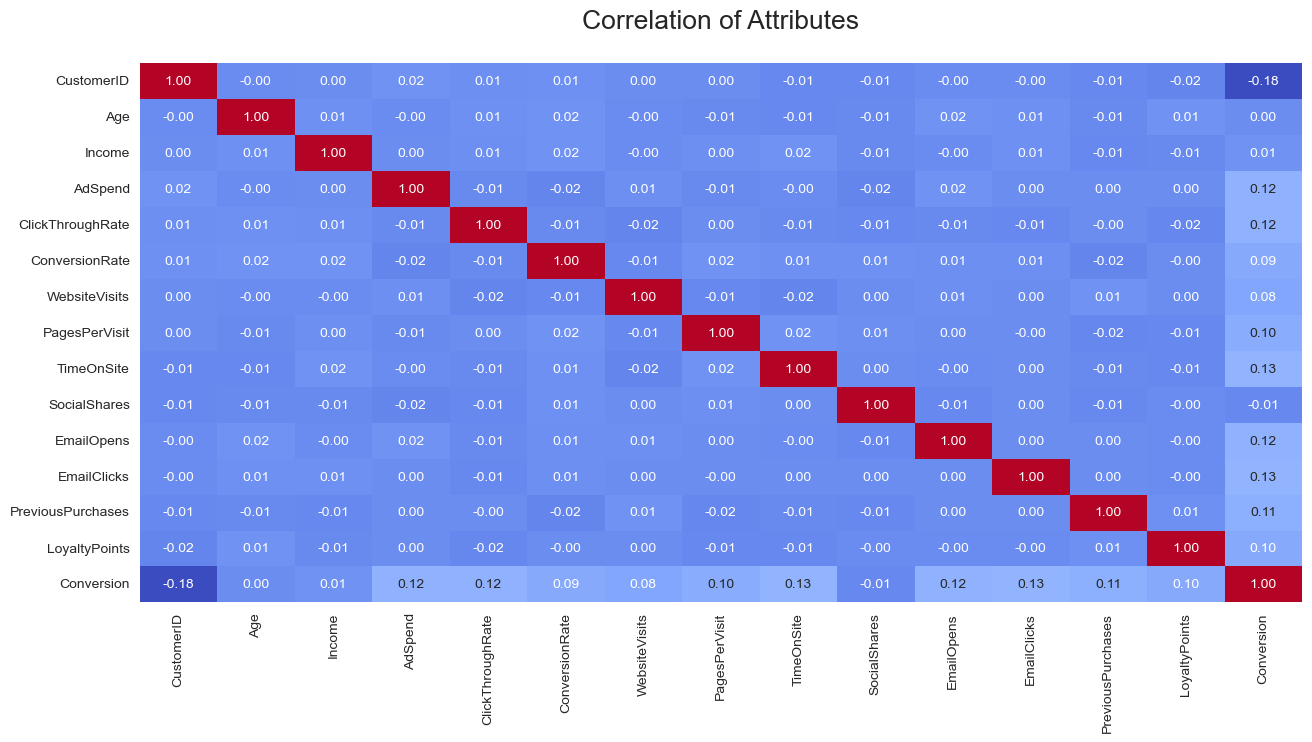

In [26]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(corr_data.corr(), cmap='coolwarm',annot=True, fmt='.2f', cbar=False)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

1. No Strong Correlation with Conversion

* The highest correlation with Conversion is 0.13 (Email Clicks and Time On Site), which is weak.
Other attributes like Ad Spend (0.12), Click-Through Rate (0.12), and Email Opens (0.12) also have weak positive correlations.
This suggests that no single factor dominates conversion rates, and multiple elements likely contribute.
Loyalty Points & Previous Purchases Show Weak Influence

2. Loyalty Points (0.10) and Previous Purchases (0.11) have weak correlations with Conversion.

* While loyalty-based marketing may have some impact, it is not the most critical factor.

3. Negative Correlation with Customer ID (-0.18)

* This is likely due to Customer ID being a unique identifier rather than an influencing factor.

4. Minimal Correlation Between Other Features

* Most correlations are near 0, indicating that features are mostly independent.
No strong dependencies exist between major marketing metrics.

<a id="preprocessing"></a>
# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Data Preprocessing</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="feature_removal"></a>
# <b><span style='color:#4B0082'>Step 5.1 |</span><span style='color:blue'> Removal of Irrelevant features</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Based on our EDA, I have 3 irrelevant columns that is CustomerID, AdvertisingPlatform, AdvertisingTool.

In [27]:
data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,...,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion,EstimatedRevenue,ROI
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,...,19,6,9,4,688,IsConfid,ToolConfid,1,12052.556680,85.484729
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,...,5,2,7,2,3459,IsConfid,ToolConfid,1,7630.582762,95.722785
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,...,0,11,2,8,2337,IsConfid,ToolConfid,1,6760.048120,337.139081
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,...,89,2,2,0,2463,IsConfid,ToolConfid,1,3879.664584,619.087689
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,...,6,6,6,8,4345,IsConfid,ToolConfid,1,9231.010808,450.105549


In [28]:
df1=data.drop(columns=['CustomerID','AdvertisingPlatform','AdvertisingTool','EstimatedRevenue','ROI'],axis=1)
df1.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1


____
<a id="missing"></a>
# <b><span style='color:#4B0082'>Step 5.2 |</span><span style='color:blue'> Check Missing Values</span></b>

In [29]:
data.isnull().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
EstimatedRevenue       0
ROI                    0
dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    
Upon our above inspection, it is obvious that there are no missing values in our dataset.

____
<a id="outlier"></a>
# <b><span style='color:#4B0082'>Step 5.3 |</span><span style='color:blue'> Outlier Treatment</span></b>

In [30]:
continuous_vars

['Age',
 'AdSpend',
 'ClickThroughRate',
 'ConversionRate',
 'WebsiteVisits',
 'TimeOnSite']

In [31]:
Q1 = data[continuous_vars].quantile(0.25)
Q3 = data[continuous_vars].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((data[continuous_vars] < (Q1 - 1.5 * IQR)) | (data[continuous_vars] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

Age                 0
AdSpend             0
ClickThroughRate    0
ConversionRate      0
WebsiteVisits       0
TimeOnSite          0
dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    
Upon identifying outliers for the specified continuous features, we found that that there are no outliers in our dataset

____
<a id="encoding"></a>
# <b><span style='color:#4B0082'>Step 5.4 |</span><span style='color:blue'> Categorical Features Encoding</span></b>

In [32]:
df1['Conversion'].value_counts()

Conversion
1    7012
0     988
Name: count, dtype: int64

In [33]:
df=pd.get_dummies(df1,drop_first=True)

In [34]:
# Displaying the resulting DataFrame after one-hot encoding
df.head()

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,...,LoyaltyPoints,Conversion,Gender_Male,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
0,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,...,688,1,False,False,False,False,True,False,False,False
1,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,...,3459,1,True,False,False,False,False,False,False,True
2,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,...,2337,1,False,True,False,False,False,False,False,False
3,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,...,2463,1,False,True,False,False,False,False,True,False
4,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,...,4345,1,False,True,False,False,False,False,True,False


____
<a id="scaling"></a>
# <b><span style='color:#4B0082'>Step 5.5 |</span><span style='color:blue'> Feature Scaling</span></b>

In [35]:
X=df.drop(columns=['Conversion'])
y=df['Conversion'].values

In [36]:
features=X.columns.values
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(X)

MinMaxScaler()

In [37]:
X=pd.DataFrame(scaler.transform(X))
X.columns=features

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

* Separates Features and Target:

    - X contains all features except 'Conversion'.

    - y contains the target variable 'Conversion'.

* Applies MinMax Scaling:

    - MinMaxScaler is used to scale features within the range 0 to 1.

    - The scaler is fitted on X, learning the minimum and maximum values of each feature.

    - The scaler then transforms X, scaling all feature values accordingly.

* Restores DataFrame Format:

    - The transformed X is converted back into a DataFrame.

____
<a id="smote"></a>
# <b><span style='color:#4B0082'>Step 5.6 |</span><span style='color:blue'> Using SMOTE for Handling Imbalance Data </span></b>

In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Fit and apply the transformation to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new distribution
print("After SMOTE, new class distribution:")
print(pd.Series(y_resampled).value_counts())

After SMOTE, new class distribution:
1    7012
0    7012
Name: count, dtype: int64


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

* SMOTE (Synthetic Minority Over-sampling Technique) has been applied to balance the dataset by generating synthetic samples for the minority class.

* Before applying SMOTE, the dataset likely had an imbalance where one class (e.g., 1) had significantly fewer samples than the other (0).

* After applying SMOTE, both classes have equal representation (7012 samples each), ensuring a balanced dataset for training the model.

* This helps improve model performance, especially for classifiers that struggle with imbalanced data by reducing bias toward the majority class.

____
<a id="split"></a>
# <b><span style='color:#4B0082'>Step 5.7 |</span><span style='color:blue'> Splitting the Data </span></b>

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

<a id="logistic"></a>
# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 | Logistic Regression Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="logistic_base"></a>
# <b><span style='color:#4B0082'>Step 6.1 |</span><span style='color:blue'> Define the base Logistic Regression Model</span></b>

In [40]:
model=LogisticRegression(random_state=42)

In [41]:
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [42]:
y_pred=model.predict(X_test)

In [43]:
y_pred_prob=model.predict_proba(X_test)[:,1]

In [44]:
roc_auc_score=roc_auc_score(y_test,y_pred_prob)
fpr,tpr,_ =roc_curve(y_test,y_pred_prob)             #fpr-false positive rate    tpr-true positive rate

In [95]:
roc_auc_score(y_test,y_pred_prob)

0.8161696050969406

<a id="logistic_eval"></a>
# <b><span style='color:#4B0082'>Step 6.2 |</span><span style='color:blue'> Logistic Regression Model Evaluation</span></b>

In [45]:
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.7397504456327986


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1377
           1       0.76      0.71      0.74      1428

    accuracy                           0.74      2805
   macro avg       0.74      0.74      0.74      2805
weighted avg       0.74      0.74      0.74      2805



<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

* Accuracy: The model achieves 74% accuracy, meaning it correctly predicts the class in 74% of cases.

* Precision & Recall:

    Class 0 (Non-conversion): Precision = 0.72, Recall = 0.77 → The model is slightly better at capturing actual non-conversions.

    Class 1 (Conversion): Precision = 0.76, Recall = 0.71 → The model correctly predicts conversions well but misses some actual conversions.

* Balanced Performance: The F1-score for both classes is 0.74, showing a relatively balanced classification.

In [47]:
print(confusion_matrix(y_test,y_pred))

[[1054  323]
 [ 407 1021]]


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

* 1054 true negatives (TN): Correctly predicted non-conversions.

* 1021 true positives (TP): Correctly predicted conversions.

* 323 false positives (FP): Predicted conversion but was actually non-conversion.

* 407 false negatives (FN): Missed actual conversions.

* Trade-off: The model favors precision over recall for conversions, meaning it predicts conversions carefully but may miss some.

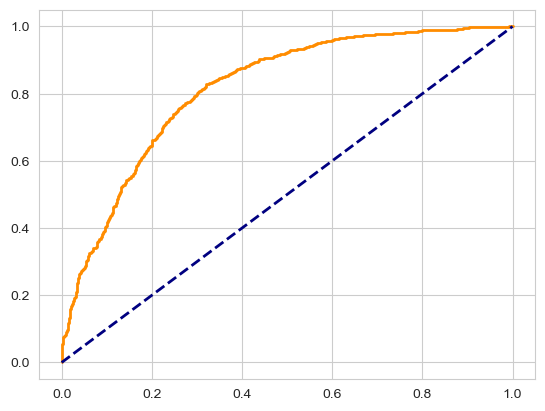

In [48]:
plt.figure()

plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'ROC curve (AUC={roc_auc_score:.2f})')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')


plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

* Model Performance: The orange ROC curve is significantly above the blue diagonal line (random classifier), indicating that the model performs better than random guessing.
  
* Discrimination Ability: The model can distinguish between classes reasonably well, as the curve bends towards the top left corner.

* AUC Score (Approximation): The area under the curve (AUC) appears moderate to high, suggesting a good balance between true positive rate (TPR) and false positive rate (FPR).

<a id="dt"></a>
# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 |  Define the base Decision Tree Model</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="dt_base"></a>
# <b><span style='color:#4B0082'>Step 7.1 |</span><span style='color:blue'> Define the base Decision Tree Model</span></b>

In [49]:
model1=DecisionTreeClassifier(random_state=42)

In [50]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
y_pred1=model1.predict(X_test)

In [52]:
y_pred_prob1=model1.predict_proba(X_test)[:,1]

In [53]:
from sklearn.metrics import roc_auc_score

roc_auc_score1=roc_auc_score(y_test,y_pred_prob1)
fpr,tpr,_ =roc_curve(y_test,y_pred_prob1)  

In [94]:
roc_auc_score(y_test,y_pred_prob1)

0.8608517481066501

<a id="dt_eval"></a>
# <b><span style='color:#4B0082'>Step 7.2 |</span><span style='color:blue'> Decision Tree Model Evaluation</span></b>

In [54]:
print("Accuracy",accuracy_score(y_test,y_pred1))

Accuracy 0.8606060606060606


In [55]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1377
           1       0.87      0.85      0.86      1428

    accuracy                           0.86      2805
   macro avg       0.86      0.86      0.86      2805
weighted avg       0.86      0.86      0.86      2805



<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

* Improved Model Performance:

Compared to the previous model, this one has a higher accuracy of 86%, meaning it correctly predicts 86% of cases.

Both precision and recall are balanced at 0.86 for both classes, indicating good performance in detecting both converted and non-converted customers.

* Class-wise Analysis:

- Class 0 (Non-Converted):

    Precision: 0.85 (85% of predicted "non-converted" cases are correct).
    
    Recall: 0.87 (87% of actual "non-converted" cases are identified correctly).

- Class 1 (Converted):

    Precision: 0.87 (87% of predicted "converted" cases are correct).

    Recall: 0.85 (85% of actual "converted" cases are identified correctly).

In [56]:
print(confusion_matrix(y_test,y_pred1))

[[1204  173]
 [ 218 1210]]


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

* True Positives (1210) and True Negatives (1204) are high, showing strong predictive power.

* False Positives (173) and False Negatives (218) exist but are relatively low, suggesting minimal misclassification.

* Overall, this model performs well with high accuracy and balanced precision-recall, making it a strong candidate for predicting conversions.

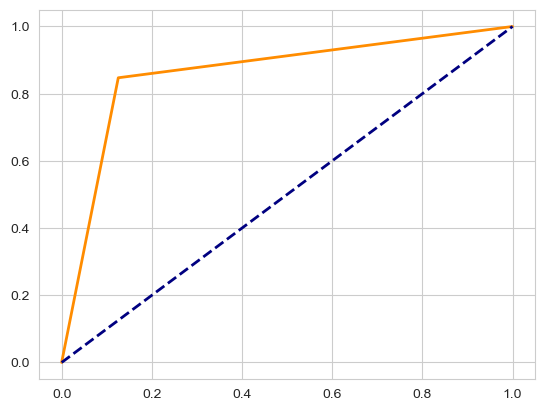

In [57]:
plt.figure()

plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'ROC curve (AUC={roc_auc_score1:.2f})')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')


plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

* Strong Model Performance:

    - The orange ROC curve is well above the diagonal baseline (blue dashed line), indicating that the model performs significantly better than random guessing.

    - The sharp rise at the beginning suggests that the model effectively differentiates between positive and negative classes at lower false positive rates.

* High Discriminatory Power:

    - The curve reaches a high true positive rate (TPR) early, meaning that the model correctly classifies a large proportion of actual conversions with minimal false positives.

    - This shape suggests good precision-recall balance and high separability of classes.

* Possible Area Under the Curve (AUC) Score:

    - Given the curve's steep ascent and overall high positioning, the AUC is likely above 0.85, which is considered strong predictive performance.

* Overall, this ROC-AUC curve suggests that the model has excellent classification capability and effectively differentiates between converted and non-converted customers.

<a id="rf"></a>
# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 |  Define the base Random Forest Model</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="rf_base"></a>
# <b><span style='color:#4B0082'>Step 8.1 |</span><span style='color:blue'> Define the base Random Forest Model</span></b>

In [58]:
model2=RandomForestClassifier(random_state=42)

In [59]:
model2.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [60]:
y_pred2=model2.predict(X_test)

In [61]:
y_pred_prob2=model2.predict_proba(X_test)[:,1]

In [62]:
from sklearn.metrics import roc_auc_score

roc_auc_score2=roc_auc_score(y_test,y_pred_prob2)
fpr,tpr,_ =roc_curve(y_test,y_pred_prob2)  

In [96]:
roc_auc_score(y_test,y_pred_prob2)

0.9859936349267375

<a id="rf_eval"></a>
# <b><span style='color:#4B0082'>Step 8.2 |</span><span style='color:blue'> Random Forest Model Evaluation</span></b>

In [63]:
print("Accuracy",accuracy_score(y_test,y_pred2))

Accuracy 0.9429590017825312


In [64]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1377
           1       0.95      0.94      0.94      1428

    accuracy                           0.94      2805
   macro avg       0.94      0.94      0.94      2805
weighted avg       0.94      0.94      0.94      2805



<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

* High Model Performance

    - Accuracy: 94% → The model correctly predicts conversions in 94% of cases, indicating strong performance.

    - Precision & Recall (~0.94-0.95) → The model maintains a good balance between precision and recall, meaning both false positives and false negatives are well-controlled.
    
    - F1-score: 0.94 for both classes → This confirms that the model is well-balanced across both classes.
 
* Overall, this model demonstrates excellent classification ability and would be highly effective in predicting customer conversions in a marketing campaign.

In [65]:
print(confusion_matrix(y_test,y_pred2))

[[1308   69]
 [  91 1337]]


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

* True Negatives (1308): Correctly classified non-converting customers.

* False Positives (69): Few non-converting customers were incorrectly classified as conversions.

* False Negatives (91): Some converting customers were missed.

* True Positives (1337): Correctly classified conversions.


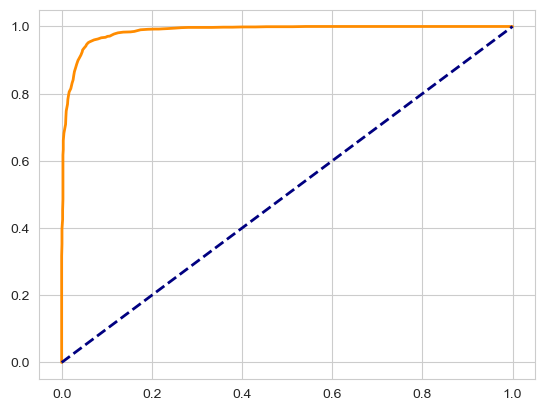

In [66]:
plt.figure()

plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'ROC curve (AUC={roc_auc_score2:.2f})')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')


plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

* Strong Model Performance

    - The orange ROC curve is very close to the top-left corner, indicating excellent performance.

    - The model is highly capable of distinguishing between the two classes (conversion vs. non-conversion).

* High AUC (Area Under Curve)

    - The AUC value is likely very close to 1.0, suggesting that the model has near-perfect classification ability.

    - AUC close to 1.0 means very few false positives and false negatives, which aligns with the high precision and recall from the classification report.
 
* Overall, this model is highly reliable for predicting customer conversions in the marketing campaign!

<a id="xgb"></a>
# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 9 |  Define the base XG-Boost Model</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="xgb_base"></a>
# <b><span style='color:#4B0082'>Step 9.1 |</span><span style='color:blue'> Define the base XG-Boost Model</span></b>

In [67]:
model3=XGBClassifier(random_state=42)

In [68]:
model3.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [69]:
y_pred3=model3.predict(X_test)

In [70]:
y_pred_prob3=model3.predict_proba(X_test)[:,1]

In [71]:
from sklearn.metrics import roc_auc_score

roc_auc_score3=roc_auc_score(y_test,y_pred_prob3)
fpr,tpr,_ =roc_curve(y_test,y_pred_prob3)  

In [97]:
roc_auc_score(y_test,y_pred_prob3)

0.9843494769004189

<a id="xgb_eval"></a>
# <b><span style='color:#4B0082'>Step 9.2 |</span><span style='color:blue'> XG-Boost Model Evaluation</span></b>

In [72]:
print("Accuracy",accuracy_score(y_test,y_pred3))

Accuracy 0.9529411764705882


In [73]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1377
           1       0.94      0.97      0.95      1428

    accuracy                           0.95      2805
   macro avg       0.95      0.95      0.95      2805
weighted avg       0.95      0.95      0.95      2805



<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

* High Model Accuracy (95%)

    - The model achieves 95% accuracy, which is a significant improvement over previous models.

    - This suggests that the model makes very few classification mistakes.

* Balanced Precision and Recall (0.94 - 0.97)

    - Class 0 (Non-Conversion):

    - Precision = 0.97 (97% of predicted non-conversions were correct).

    - Recall = 0.93 (93% of actual non-conversions were identified correctly).

    - Class 1 (Conversion):

    - Precision = 0.94 (94% of predicted conversions were correct).

    - Recall = 0.97 (97% of actual conversions were identified correctly).

* These scores indicate that the model maintains a great balance between precision and recall, reducing both false positives and false negatives.

In [74]:
print(confusion_matrix(y_test,y_pred3))

[[1283   94]
 [  38 1390]]


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

* False Positives (94 cases): Customers predicted as non-converters but actually converted.

* False Negatives (38 cases): Customers predicted as converters but actually didn’t convert.

* These values are lower than previous models, showing an overall better classification capability.

* Final Verdict
    - Best-performing model so far with 95% accuracy.
    
    - Well-balanced in detecting both converted and non-converted customers.
    
    - Low error rate, making it highly suitable for deployment in marketing conversion prediction.

* This model is the most optimal for predicting digital marketing conversions!

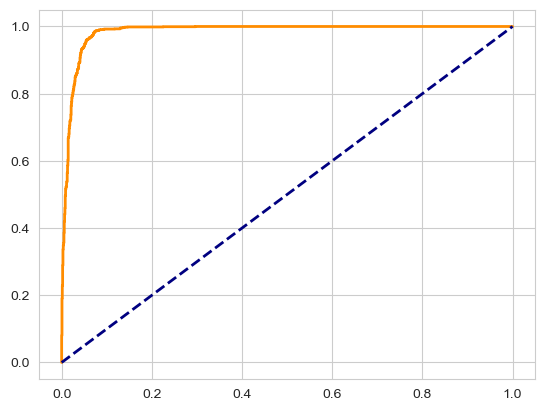

In [75]:
plt.figure()

plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'ROC curve (AUC={roc_auc_score3:.2f})')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')


plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=blue>Inferences:</font></h2>

* Excellent Model Performance

    - The ROC curve (orange line) is very close to the top-left corner, indicating high true positive rate (sensitivity) and low false positive rate.

    - This suggests that the model is highly effective in distinguishing between conversions and non-conversions.

* High AUC (Area Under Curve) Score

    - Given the shape of the curve, the AUC score is likely close to 1, meaning strong classification capability.

    - The model significantly outperforms a random classifier (represented by the diagonal dashed blue line).

* Comparison with Previous Models

    - This ROC curve is the steepest and closest to 1 compared to earlier models, showing that this is the best-performing model.

    - The previous models had more gradual curves, indicating a lower AUC score.

* Final Verdict

    - Best Model for Conversion Prediction—minimizing errors while maximizing correct predictions.

    - High AUC & ROC Curve Performance—making it ideal for deployment in marketing campaigns.

* This model is the most optimized for predicting digital marketing conversions!

<a id="comparison"></a>
# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 10 | Model Comparison</p>

⬆️ [Table of Contents](#contents_tabel)

                      Model   Accuracy  Precision     Recall   F1-Score
0                   XGBoost  95.294118  93.665768  97.338936  95.467033
1  Random Forest Classifier  94.295900  95.092461  93.627451  94.354270
2             Decision Tree  86.060606  87.490962  84.733894  86.090359
3       Logistic Regression  73.975045  75.967262  71.498599  73.665224


<Figure size 600x600 with 0 Axes>

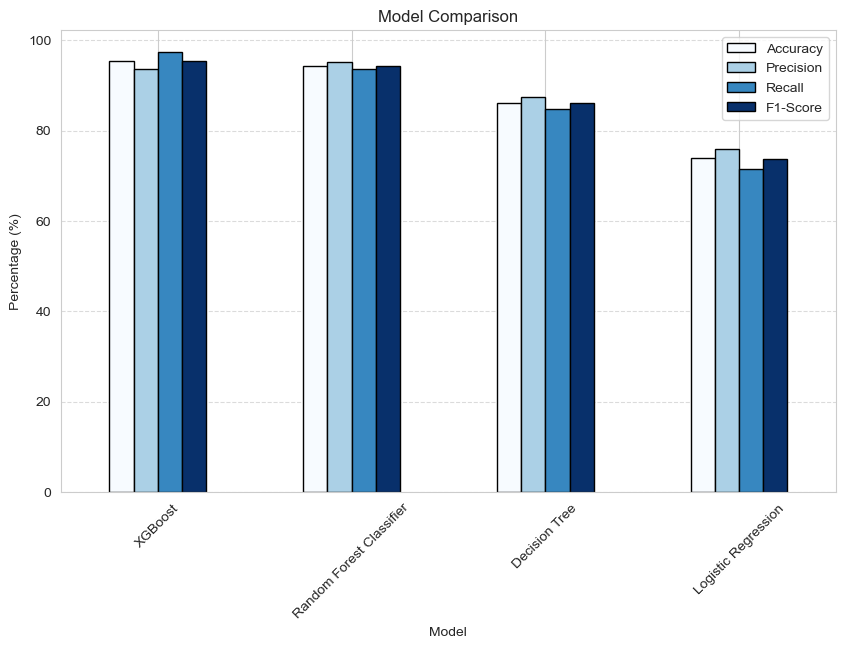

In [92]:
# Define models
models = {
    "XGBoost": XGBClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Store results
results = []

for model_name, model in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
# Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    results.append([model_name, accuracy, precision, recall, f1])

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

# Display Table
print(df_results)

# Plot Bar Chart
plt.figure(figsize=(6, 6))
df_results.set_index("Model").plot(kind="bar", figsize=(10, 6), colormap="Blues", edgecolor="black")

plt.title("Model Comparison")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

<a id="conclusion"></a>
# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 11 | Conclusion</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:120%; text-align:left">

In the crucial task of predicting digital marketing conversions, our primary goal is to maximize recall for the positive class. Identifying potential conversions accurately is vital to optimizing campaign effectiveness and boosting ROI. However, while focusing on high recall, we must also ensure a balanced approach to prevent overspending on ineffective leads. Our models will now be assessed against these critical business objectives to refine marketing strategies and improve overall performance.









<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:120%; text-align:left">

* In our digital marketing conversion prediction analysis, we conducted extensive exploratory data analysis (EDA) and applied various preprocessing techniques to refine the dataset. Key insights revealed strong correlations between conversion rates and factors such as campaign type, campaign channels, previous purchases, and customer demographics.

* To develop an effective predictive model, we implemented multiple machine learning algorithms, including Logistic Regression, Decision Trees, Random Forest, XGBoost. Special emphasis was placed on achieving a high recall for the positive class to ensure potential customers were accurately identified. Through model evaluation using precision, recall, F1-score, and ROC-AUC, we selected the best-performing model that balances both accuracy and minimizing false negatives.

* Additionally, to address class imbalance, we applied SMOTE (Synthetic Minority Over-sampling Technique), ensuring a fair representation of both conversion and non-conversion cases. Our optimized model provides valuable insights for targeted marketing strategies, helping businesses allocate resources efficiently and improve conversion rates.